In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

In [7]:
# Load the dataset
data = pd.read_csv('troop_movements.csv')

counts_of_data = data.groupby(['empire_or_resistance']).size().reset_index(name='count')
print(counts_of_data)

  empire_or_resistance  count
0               empire    480
1           resistance    520


In [8]:
count_of_homeworld = data.groupby('homeworld').size().reset_index(name='count')
print(count_of_homeworld)

       homeworld  count
0       Alderaan     29
1    Aleen Minor     26
2     Bestine IV     22
3          Cerea     21
4       Champala     32
5      Chandrila     21
6   Concord Dawn     20
7       Corellia     27
8        Dagobah     20
9       Dathomir     28
10         Dorin     25
11        Eriadu     28
12   Glee Anselm     27
13    Haruun Kal     12
14       Iktotch     22
15      Iridonia     22
16         Kalee     20
17      Kashyyyk     23
18     Malastare     23
19        Mirial     27
20      Mon Cala     26
21    Muunilinst     17
22         Naboo     22
23          Ojom     24
24       Quermia     23
25         Rodia     25
26        Ryloth     33
27       Serenno     27
28         Shili     16
29         Skako     21
30       Socorro     27
31       Stewjon     16
32       Sullust     28
33      Tatooine     36
34       Tholoth     24
35      Toydaria     26
36     Trandosha     19
37       Troiken     25
38          Tund     17
39        Umbara     23
40       Vulpter

In [13]:
# Groups of unit types

unit_types = data.groupby('unit_type').size().reset_index(name='count')
unit_types

,unit_type,count
0,at-at,109
1,at-st,133
2,resistance_soldier,130
3,stormtrooper,108
4,tie_fighter,127
5,tie_silencer,137
6,unknown,133
7,x-wing,123


C:\Users\wasadmin\AppData\Local\Temp\2\ipykernel_12056\490835649.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='empire_or_resistance', palette=['#1f77b4', '#ff7f0e'])


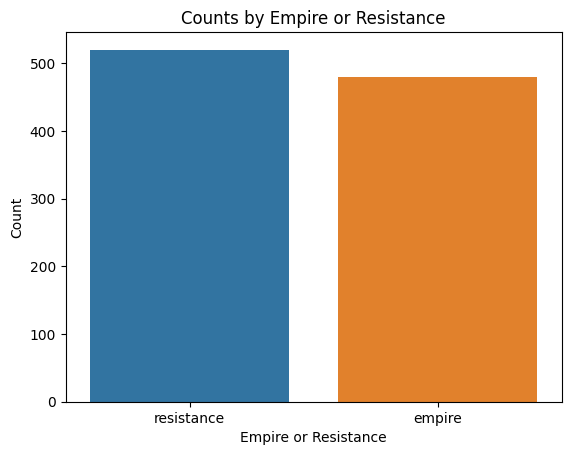

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for 'empire_or_resistance'
sns.countplot(data=data, x='empire_or_resistance', palette=['#1f77b4', '#ff7f0e'])

plt.title('Counts by Empire or Resistance')
plt.xlabel('Empire or Resistance')
plt.ylabel('Count')
plt.show()


In [ ]:
# Descion Tree that predicts if a character is joining eithe rthe empire or the resistance 
# based on their homeworld and unit type

from sklearn.tree import DecisionTreeClassifier

features = ['unit_type', 'homeworld']
x, y = data[features], data['empire_or_resistance']

# Encode categorical features
x_encoded = pd.get_dummies(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=42)

dtc = DecisionTreeClassifier(random_state=42)